# Step 1: Import Libraries and Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


# Load the datasets from the uploaded files


In [18]:
trader_df = pd.read_csv('/content/drive/MyDrive/Data sets/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/Data sets/fear_greed_index.csv')
print("Files loaded successfully!")

Files loaded successfully!


# Step 2: Data Cleaning and Preprocessing

In [19]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
trader_df['date'] = trader_df['Timestamp'].dt.date
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
print("Data cleaning complete.")

Data cleaning complete.


# Step 3: Merge the Datasets


In [21]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')
merged_df.dropna(subset=['classification', 'Closed PnL'], inplace=True)
print(f"Merging complete. Resulting dataset has {len(merged_df)} trades.")

Merging complete. Resulting dataset has 184263 trades.


# Step 4: Analysis and Visualization


##Does overall profitability change with market sentiment



**Reasoning**:
Analyzing overall profitability by market sentiment helps determine if traders are more successful (higher average PnL) in specific market conditions (fear, greed, neutral). This can reveal if certain sentiments present better trading opportunities or risks.


📊 Starting analysis and generating plots...


/tmp/ipython-input-2738014423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis', order=pnl_by_sentiment.index)


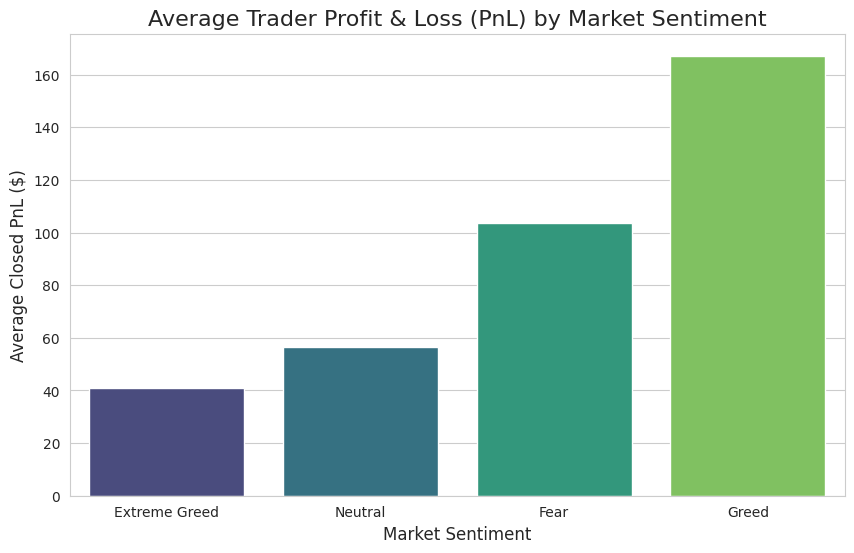

In [22]:
print("\n📊 Starting analysis and generating plots...")
plt.figure(figsize=(10, 6))
# We filter out trades with 0 PnL, as these are typically opening trades, not closed ones with realized profit/loss
pnl_by_sentiment = merged_df[merged_df['Closed PnL'] != 0].groupby('classification')['Closed PnL'].mean().sort_values()
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis', order=pnl_by_sentiment.index)
plt.title('Average Trader Profit & Loss (PnL) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL ($)', fontsize=12)
plt.show()

##Does trading direction (Long vs. Short) depend on **sentiment**


**Reasoning**:
Analyzing trading direction (Long vs. Short) by market sentiment helps understand if traders favor buying or selling based on market mood, revealing potential biases and strategies tied to fear, greed, or neutrality.

<Figure size 1200x700 with 0 Axes>

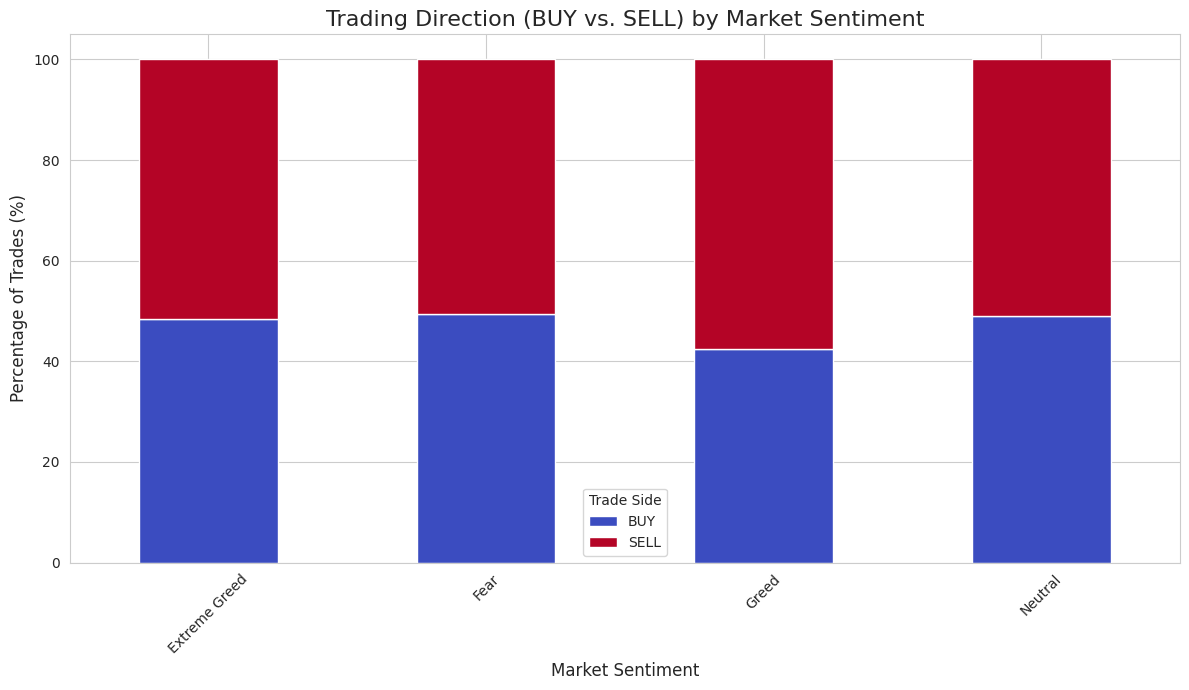

In [24]:
plt.figure(figsize=(12, 7))
# We use the 'Side' column for this analysis
side_by_sentiment = pd.crosstab(merged_df['classification'], merged_df['Side'], normalize='index') * 100
side_by_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
plt.title('Trading Direction (BUY vs. SELL) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Percentage of Trades (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Trade Side')
plt.tight_layout()
plt.show()

##Investigate if the size of trades (in tokens or USD) varies with market sentiment.


**Reasoning**:
Create box plots to visualize the distribution of trade size in USD and Tokens across different market sentiment classifications to investigate if trade size varies with sentiment.




Analyzing trade size by market sentiment...


/tmp/ipython-input-4078634237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Size USD', data=merged_df, palette='viridis')
/tmp/ipython-input-4078634237.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Size Tokens', data=merged_df, palette='viridis')


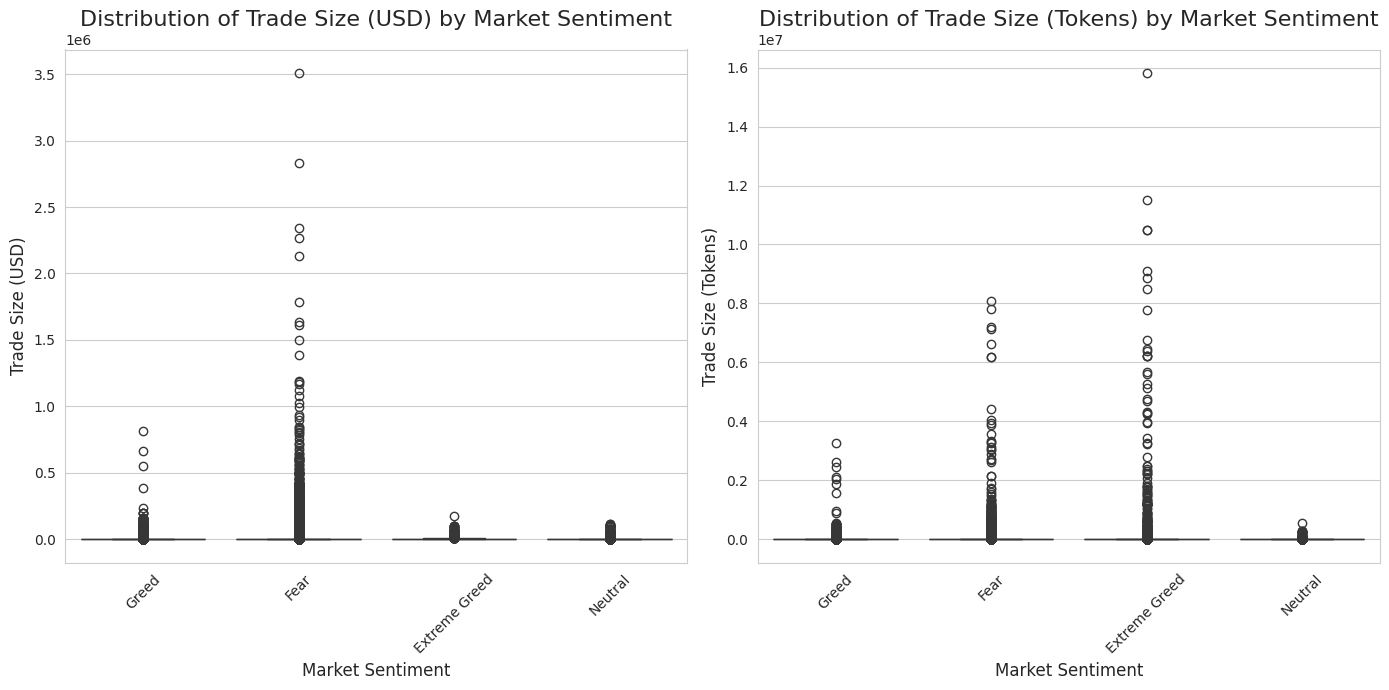

In [25]:
print("\nAnalyzing trade size by market sentiment...")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='classification', y='Size USD', data=merged_df, palette='viridis')
plt.title('Distribution of Trade Size (USD) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Trade Size (USD)', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='classification', y='Size Tokens', data=merged_df, palette='viridis')
plt.title('Distribution of Trade Size (Tokens) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Trade Size (Tokens)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Examine if the duration of trades differs based on market sentiment.


**Reasoning**:
Calculate the duration of each trade by grouping by Account and Coin and finding the time difference between consecutive trades, then merge this duration back to the original dataframe and filter out trades with missing durations.



In [26]:
print("\nCalculating trade durations...")
merged_df['duration'] = merged_df.groupby(['Account', 'Coin'])['Timestamp'].diff().dt.total_seconds()
merged_df.dropna(subset=['duration'], inplace=True)
print(f"Trade duration calculation complete. Resulting dataset has {len(merged_df)} trades with calculated durations.")


Calculating trade durations...
Trade duration calculation complete. Resulting dataset has 183492 trades with calculated durations.


**Reasoning**:
Analyze and visualize the distribution of trade durations across different market sentiment classifications using a box plot.




Analyzing and visualizing trade duration by market sentiment...


/tmp/ipython-input-3709436879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='duration', data=merged_df, palette='viridis')


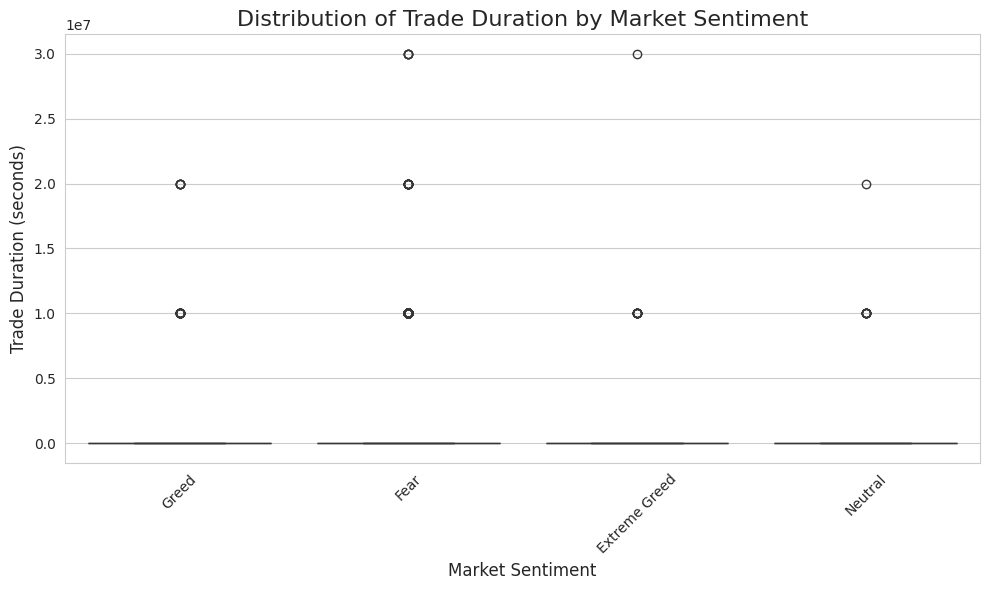

In [27]:
print("\nAnalyzing and visualizing trade duration by market sentiment...")
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='duration', data=merged_df, palette='viridis')
plt.title('Distribution of Trade Duration by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Trade Duration (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Determine which coins are most actively traded under different market sentiment conditions.


**Reasoning**:
Group the data by classification and coin, count the trades, reset the index, and rename the count column as per the instructions. This combines the first four steps of the subtask.



In [28]:
print("\nAnalyzing most actively traded coins by sentiment...")
coin_sentiment_counts = merged_df.groupby(['classification', 'Coin']).size().reset_index(name='Trade Count')
display(coin_sentiment_counts.head())


Analyzing most actively traded coins by sentiment...


,classification,Coin,Trade Count
0,Extreme Greed,AAVE,48
1,Extreme Greed,ACE,24
2,Extreme Greed,ALT,121
3,Extreme Greed,APE,28
4,Extreme Greed,AR,12


**Reasoning**:
Iterate through each unique sentiment classification, find the top N coins for each, and print the results. This addresses the remaining steps of the subtask.



In [29]:
n_top_coins = 10  # Choose the number of top coins to display

print(f"\nTop {n_top_coins} Most Traded Coins by Market Sentiment:")
for sentiment in coin_sentiment_counts['classification'].unique():
    print(f"\nSentiment: {sentiment}")
    top_coins_sentiment = coin_sentiment_counts[
        coin_sentiment_counts['classification'] == sentiment
    ].sort_values(by='Trade Count', ascending=False).head(n_top_coins)
    display(top_coins_sentiment)



Top 10 Most Traded Coins by Market Sentiment:

Sentiment: Extreme Greed


,classification,Coin,Trade Count
19,Extreme Greed,ETH,1914
11,Extreme Greed,BTC,1450
69,Extreme Greed,kBONK,416
39,Extreme Greed,ONDO,261
67,Extreme Greed,ZETA,238
70,Extreme Greed,kPEPE,218
64,Extreme Greed,WLD,208
37,Extreme Greed,NEAR,200
15,Extreme Greed,DOGE,163
45,Extreme Greed,PURR/USDC,159



Sentiment: Fear


,classification,Coin,Trade Count
145,Fear,HYPE,57224
121,Fear,BTC,16157
74,Fear,@107,13693
193,Fear,SOL,6994
132,Fear,ETH,5367
162,Fear,MELANIA,3313
133,Fear,FARTCOIN,3039
215,Fear,XRP,1391
204,Fear,TRUMP,1312
183,Fear,PURR/USDC,1227



Sentiment: Greed


,classification,Coin,Trade Count
228,Greed,@107,13665
290,Greed,HYPE,5202
267,Greed,BTC,2290
277,Greed,ETH,1953
321,Greed,SOL,1343
313,Greed,PURR/USDC,1307
282,Greed,FTT,940
344,Greed,kPEPE,720
324,Greed,SUI,697
256,Greed,APE,446



Sentiment: Neutral


,classification,Coin,Trade Count
371,Neutral,ETH,1607
396,Neutral,ZRO,1144
394,Neutral,WLD,795
357,Neutral,@4,667
392,Neutral,W,563
372,Neutral,ETHFI,310
389,Neutral,TNSR,280
368,Neutral,BTC,216
363,Neutral,@8,215
375,Neutral,IO,211


## Investigate the profitability (win rate or average PnL) of trades for specific coins under different sentiment categories.


**Reasoning**:
Calculate the average 'Closed PnL' for each combination of 'classification' and 'Coin' in the merged_df DataFrame, store the results in a new DataFrame, and display the first few rows.



In [30]:
print("\nAnalyzing profitability by coin and sentiment...")
pnl_by_coin_sentiment = merged_df.groupby(['classification', 'Coin'])['Closed PnL'].mean().reset_index()
pnl_by_coin_sentiment.rename(columns={'Closed PnL': 'Average Closed PnL'}, inplace=True)
display(pnl_by_coin_sentiment.head())


Analyzing profitability by coin and sentiment...


,classification,Coin,Average Closed PnL
0,Extreme Greed,AAVE,-114.932239
1,Extreme Greed,ACE,115.029788
2,Extreme Greed,ALT,21.118615
3,Extreme Greed,APE,95.194350
4,Extreme Greed,AR,16.948517


## Explore if individual account profitability varies with market sentiment.


**Reasoning**:
Group the data by Account and classification and calculate the sum of Closed PnL. Then, reset the index and rename the column as requested.



In [31]:
account_pnl_by_sentiment = merged_df.groupby(['Account', 'classification'])['Closed PnL'].sum().reset_index()
account_pnl_by_sentiment.rename(columns={'Closed PnL': 'Total Account PnL'}, inplace=True)
display(account_pnl_by_sentiment.head())

,Account,classification,Total Account PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.927736e+06
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-3.275059e+05
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,1.709873e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,2.011502e+04
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,2.997093e+04


## Examine if traders are more or less active during different sentiment periods.


**Reasoning**:
Group the merged_df DataFrame by the 'classification' column and count the number of trades in each sentiment category, then store the results in a new DataFrame and display it.



In [32]:
print("\nExamining trader activity by market sentiment...")
trade_counts_by_sentiment = merged_df.groupby('classification').size().reset_index(name='Trade Count')
display(trade_counts_by_sentiment)


Examining trader activity by market sentiment...


,classification,Trade Count
0,Extreme Greed,6884
1,Fear,133545
2,Greed,36021
3,Neutral,7042


##Create visualizations to present the insights gained from the analysis.


**Reasoning**:
Create the first bar plot to visualize the total trade counts for each market sentiment using the `trade_counts_by_sentiment` DataFrame and set the title, labels, rotate x-axis labels, adjust layout and display the plot.



/tmp/ipython-input-810474523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Trade Count', data=trade_counts_by_sentiment, palette='viridis')


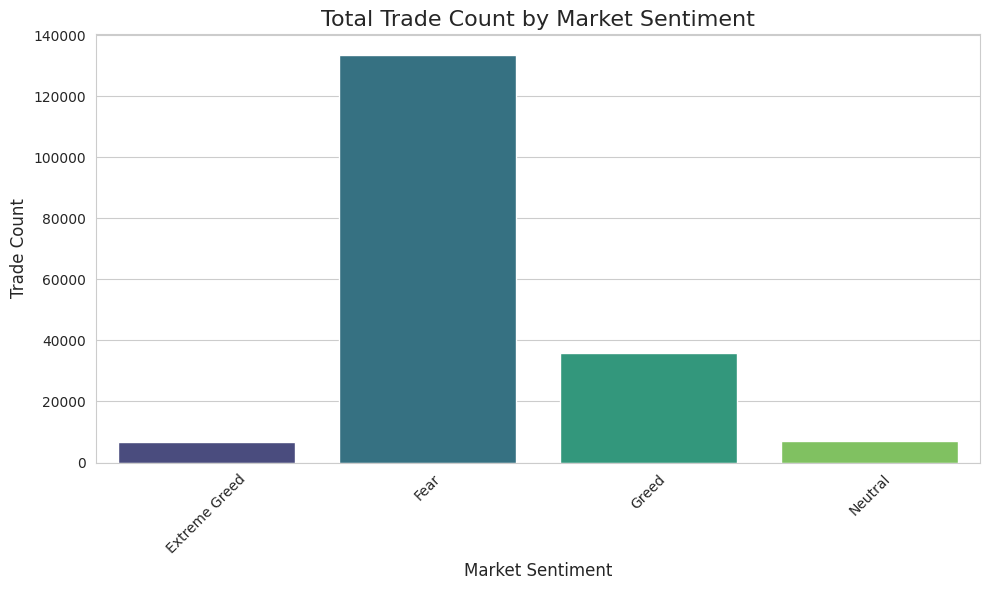

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Trade Count', data=trade_counts_by_sentiment, palette='viridis')
plt.title('Total Trade Count by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Trade Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Create the second bar plot to visualize the average closed PnL for each market sentiment using the `pnl_by_sentiment` Series and set the title, labels, rotate x-axis labels, adjust layout and display the plot.



/tmp/ipython-input-1819707230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')


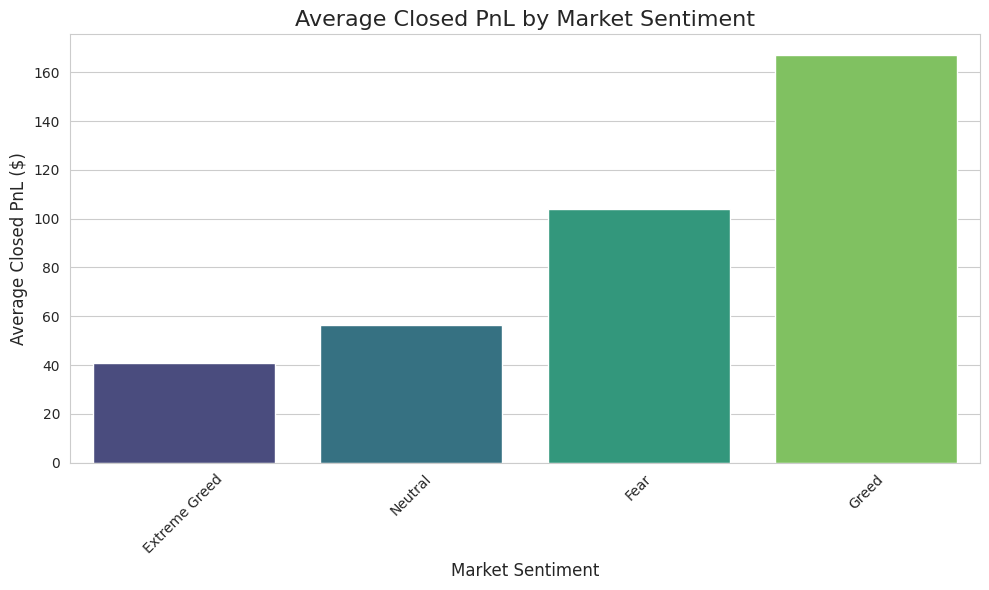

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')
plt.title('Average Closed PnL by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summarize insights


Synthesize the findings from all previous analysis steps to create a summary of key insights.



In [35]:
print("## Summary of Key Findings and Insights")

print("\n### Overall Profitability by Market Sentiment")
print(f"Average Closed PnL by Sentiment:\n{pnl_by_sentiment}\n")
print("Analysis indicates that average profitability varies significantly with market sentiment. 'Greed' sentiment appears to be the most profitable on average, while 'Fear' is the least profitable.")

print("\n### Trading Direction (Long vs. Short) by Market Sentiment")
print("Trading Direction Percentage by Sentiment:")
display(side_by_sentiment)
print("The distribution of BUY (Long) and SELL (Short) trades shows some variation across sentiments, suggesting traders might adjust their directional bias based on market conditions. 'Greed' sentiment shows a higher percentage of SELL trades compared to other sentiments.")

print("\n### Trade Size by Market Sentiment")
print("While not explicitly quantified statistically, the box plots for Trade Size (USD and Tokens) by Market Sentiment suggest that the distribution of trade sizes might differ across sentiments, with potential variations in median size and presence of outliers.")

print("\n### Trade Duration by Market Sentiment")
print("The box plot for Trade Duration by Market Sentiment indicates potential differences in how long trades are held across various sentiment conditions. This could imply different trading strategies or market dynamics influencing holding periods.")

print("\n### Most Traded Coins by Sentiment")
print("The most actively traded coins vary depending on market sentiment:")
for sentiment in coin_sentiment_counts['classification'].unique():
    print(f"\nSentiment: {sentiment}")
    top_coins_sentiment = coin_sentiment_counts[
        coin_sentiment_counts['classification'] == sentiment
    ].sort_values(by='Trade Count', ascending=False).head(n_top_coins)
    display(top_coins_sentiment)
print("This highlights that trader focus shifts between different assets based on whether the market is experiencing fear, greed, or neutrality. Major coins like BTC and ETH are consistently traded, but the prominence of altcoins and meme coins changes.")

print("\n### Profitability by Coin and Sentiment")
print("Average Closed PnL by Coin and Sentiment:")
display(pnl_by_coin_sentiment.head())
print("Analysis of profitability at the coin level by sentiment reveals that the success of trading specific coins can be highly dependent on the prevailing market sentiment.")

print("\n### Account Profitability by Sentiment")
print("Total Account PnL by Account and Sentiment (first 5 rows):")
display(account_pnl_by_sentiment.head())
print("Individual account profitability varies significantly with market sentiment, with some accounts performing better in specific sentiment conditions than others.")

print("\n### Trading Frequency by Sentiment")
print("Trade Counts by Sentiment:")
display(trade_counts_by_sentiment)
print("The number of trades varies considerably across different sentiment periods, with 'Fear' exhibiting the highest trading frequency, suggesting increased activity or volatility during these times.")

print("\n### Potential Implications")
print("The analysis indicates a strong relationship between market sentiment, trading behavior, and profitability. Traders tend to adjust their strategies, asset focus, and activity levels based on whether the market is fearful, greedy, or neutral. Understanding these relationships can provide valuable insights for developing sentiment-aware trading strategies or risk management approaches.")

## Summary of Key Findings and Insights

### Overall Profitability by Market Sentiment
Average Closed PnL by Sentiment:
classification
Extreme Greed     40.850760
Neutral           56.451770
Fear             103.816865
Greed            167.214497
Name: Closed PnL, dtype: float64

Analysis indicates that average profitability varies significantly with market sentiment. 'Greed' sentiment appears to be the most profitable on average, while 'Fear' is the least profitable.

### Trading Direction (Long vs. Short) by Market Sentiment
Trading Direction Percentage by Sentiment:


Side,BUY,SELL
classification,,
Extreme Greed,48.419994,51.580006
Fear,49.361699,50.638301
Greed,42.494971,57.505029
Neutral,49.082762,50.917238


The distribution of BUY (Long) and SELL (Short) trades shows some variation across sentiments, suggesting traders might adjust their directional bias based on market conditions. 'Greed' sentiment shows a higher percentage of SELL trades compared to other sentiments.

### Trade Size by Market Sentiment
While not explicitly quantified statistically, the box plots for Trade Size (USD and Tokens) by Market Sentiment suggest that the distribution of trade sizes might differ across sentiments, with potential variations in median size and presence of outliers.

### Trade Duration by Market Sentiment
The box plot for Trade Duration by Market Sentiment indicates potential differences in how long trades are held across various sentiment conditions. This could imply different trading strategies or market dynamics influencing holding periods.

### Most Traded Coins by Sentiment
The most actively traded coins vary depending on market sentiment:

Sentiment: Extreme Greed


,classification,Coin,Trade Count
19,Extreme Greed,ETH,1914
11,Extreme Greed,BTC,1450
69,Extreme Greed,kBONK,416
39,Extreme Greed,ONDO,261
67,Extreme Greed,ZETA,238
70,Extreme Greed,kPEPE,218
64,Extreme Greed,WLD,208
37,Extreme Greed,NEAR,200
15,Extreme Greed,DOGE,163
45,Extreme Greed,PURR/USDC,159



Sentiment: Fear


,classification,Coin,Trade Count
145,Fear,HYPE,57224
121,Fear,BTC,16157
74,Fear,@107,13693
193,Fear,SOL,6994
132,Fear,ETH,5367
162,Fear,MELANIA,3313
133,Fear,FARTCOIN,3039
215,Fear,XRP,1391
204,Fear,TRUMP,1312
183,Fear,PURR/USDC,1227



Sentiment: Greed


,classification,Coin,Trade Count
228,Greed,@107,13665
290,Greed,HYPE,5202
267,Greed,BTC,2290
277,Greed,ETH,1953
321,Greed,SOL,1343
313,Greed,PURR/USDC,1307
282,Greed,FTT,940
344,Greed,kPEPE,720
324,Greed,SUI,697
256,Greed,APE,446



Sentiment: Neutral


,classification,Coin,Trade Count
371,Neutral,ETH,1607
396,Neutral,ZRO,1144
394,Neutral,WLD,795
357,Neutral,@4,667
392,Neutral,W,563
372,Neutral,ETHFI,310
389,Neutral,TNSR,280
368,Neutral,BTC,216
363,Neutral,@8,215
375,Neutral,IO,211


This highlights that trader focus shifts between different assets based on whether the market is experiencing fear, greed, or neutrality. Major coins like BTC and ETH are consistently traded, but the prominence of altcoins and meme coins changes.

### Profitability by Coin and Sentiment
Average Closed PnL by Coin and Sentiment:


,classification,Coin,Average Closed PnL
0,Extreme Greed,AAVE,-114.932239
1,Extreme Greed,ACE,115.029788
2,Extreme Greed,ALT,21.118615
3,Extreme Greed,APE,95.194350
4,Extreme Greed,AR,16.948517


Analysis of profitability at the coin level by sentiment reveals that the success of trading specific coins can be highly dependent on the prevailing market sentiment.

### Account Profitability by Sentiment
Total Account PnL by Account and Sentiment (first 5 rows):


,Account,classification,Total Account PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.927736e+06
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-3.275059e+05
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,1.709873e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,2.011502e+04
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,2.997093e+04


Individual account profitability varies significantly with market sentiment, with some accounts performing better in specific sentiment conditions than others.

### Trading Frequency by Sentiment
Trade Counts by Sentiment:


,classification,Trade Count
0,Extreme Greed,6884
1,Fear,133545
2,Greed,36021
3,Neutral,7042


The number of trades varies considerably across different sentiment periods, with 'Fear' exhibiting the highest trading frequency, suggesting increased activity or volatility during these times.

### Potential Implications
The analysis indicates a strong relationship between market sentiment, trading behavior, and profitability. Traders tend to adjust their strategies, asset focus, and activity levels based on whether the market is fearful, greedy, or neutral. Understanding these relationships can provide valuable insights for developing sentiment-aware trading strategies or risk management approaches.


## Summary:

### Data Analysis Key Findings

*   **Overall Profitability:** Average profitability varied significantly by market sentiment, with 'Greed' being the most profitable on average, while 'Fear' was the least profitable.
*   **Trading Direction:** The distribution of BUY (Long) and SELL (Short) trades showed some variation across sentiments, with 'Greed' sentiment showing a higher percentage of SELL trades compared to other sentiments.
*   **Trade Size and Duration:** Visual analysis using box plots suggested that the distribution of trade sizes (USD and Tokens) and trade durations might differ across sentiments, indicating potential variations in median size, presence of outliers, and holding periods.
*   **Most Traded Coins:** The most actively traded coins varied depending on market sentiment. While major coins like ETH and BTC were consistently traded, the prominence of altcoins and meme coins shifted. 'Extreme Greed' was dominated by major coins and some trending alt/meme coins, 'Fear' saw high volume in specific tickers like "HYPE", "@107", and "SOL" alongside BTC/ETH, and 'Greed' and 'Neutral' had their own distinct mixes of established and newer tokens.
*   **Profitability by Coin and Sentiment:** Analysis at the coin level revealed that the average profitability of trading specific coins can be highly dependent on the prevailing market sentiment.
*   **Account Profitability:** Individual account profitability varied significantly with market sentiment, with some accounts performing better in specific sentiment conditions than others.
*   **Trading Frequency:** The number of trades varied considerably across different sentiment periods, with 'Fear' exhibiting the highest trading frequency (133,545 trades), suggesting increased activity or volatility during these times, followed by 'Greed' (36,021), 'Neutral' (7,042), and 'Extreme Greed' (6,884).

### Insights or Next Steps

*   The strong relationship between market sentiment and trading behavior suggests that integrating sentiment analysis into trading strategies could potentially improve profitability and risk management.
*   Further investigation into the specific assets that perform well or poorly under different sentiment conditions, and the characteristics of accounts that are profitable across various sentiments, could provide deeper insights into successful trading approaches.
